In [28]:
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import style

In [29]:
plt.style.use('fivethirtyeight')

STOCKS_FILE = "/tmp/stocks.csv"
STOCK_NAME = "csco"
STOCKS_URL = "https://api.iextrading.com/1.0/stock/{}/batch?types=chart&range=1m".format(STOCK_NAME)

In [30]:
# Getting the stocks data and write to file
res = requests.get(STOCKS_URL)
data = res.json()["chart"]
keys = data[0].keys()
with open(STOCKS_FILE, 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(data)

In [31]:
# Load stocks file using pandas and disply 10 lines as table
df = pd.read_csv(STOCKS_FILE)
df.head(n=10)

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2018-02-05,40.870,41.405,38.720,38.78,52399572,52399572,-2.15,-5.253,40.0940,Feb 5,0.000000
1,2018-02-06,38.330,40.305,37.350,40.17,55171559,55171559,1.39,3.584,39.2610,Feb 6,0.035843
2,2018-02-07,40.310,41.206,40.030,40.34,32690837,32690837,0.17,0.423,40.6266,Feb 7,0.040227
3,2018-02-08,40.440,40.760,38.720,38.77,42982066,42982066,-1.57,-3.892,39.6670,Feb 8,-0.000258
4,2018-02-09,39.000,39.920,38.230,39.53,51304217,51304217,0.76,1.960,39.0776,Feb 9,0.019340
5,2018-02-12,40.515,40.910,40.225,40.60,38210735,38210735,1.07,2.707,40.6402,Feb 12,0.046931
6,2018-02-13,40.500,41.310,40.220,41.23,30999078,30999078,0.63,1.552,40.8453,Feb 13,0.063177
7,2018-02-14,41.040,42.260,40.990,42.09,43835852,43835852,0.86,2.086,41.8852,Feb 14,0.085353
8,2018-02-15,45.065,45.130,43.260,44.08,72267456,72267456,1.99,4.728,43.9161,Feb 15,0.136668
9,2018-02-16,43.885,45.090,43.790,44.33,39267531,39267531,0.25,0.567,44.5904,Feb 16,0.143115


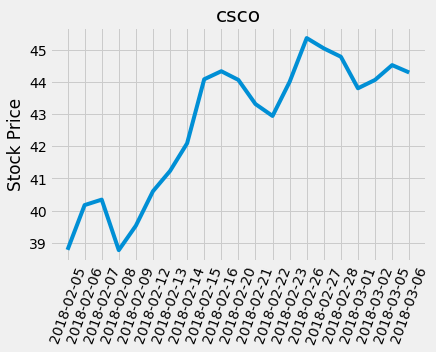

In [32]:
# Disply the stocks price visually using Matplotlib
plt.plot(df["date"], df["close"])
plt.title(STOCK_NAME)
plt.ylabel('Stock Price')
plt.xticks(rotation=70)
plt.grid(True)
plt.show()

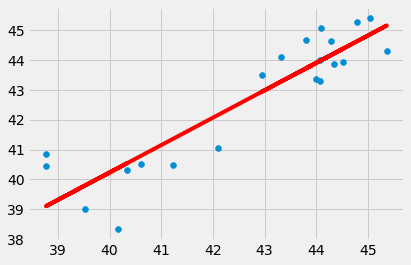

In [39]:
# Calculate linear regression and plot
xs = df["close"]
ys = df["open"]
m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
b = mean(ys) - m*mean(xs)
regression_line = [(m*x) + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regression_line, color="r")